In [1]:
import pandas
import numpy

In [2]:
dataset = pandas.read_csv("uncleandata.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15099 entries, 0 to 15098
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15099 non-null  float64
 1   last_evaluation        15099 non-null  float64
 2   number_project         15099 non-null  int64  
 3   average_montly_hours   14728 non-null  float64
 4   time_spend_company     14948 non-null  float64
 5   work_accident          15099 non-null  int64  
 6   left                   15099 non-null  object 
 7   promotion_last_5years  15099 non-null  int64  
 8   is_smoker              239 non-null    object 
 9   department             15099 non-null  object 
 10  salary                 15099 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


In [4]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15094     True
15095     True
15096     True
15097     True
15098     True
Length: 15099, dtype: bool

In [5]:
dataset.duplicated().sum()

2840

In [6]:
dataset = dataset.drop_duplicates()
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


array([[<AxesSubplot:title={'center':'satisfaction_level'}>]],
      dtype=object)

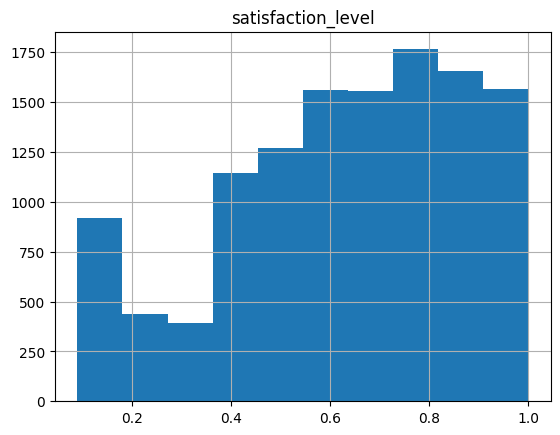

In [7]:
dataset.hist(column='satisfaction_level')

array([[<AxesSubplot:title={'center':'last_evaluation'}>]], dtype=object)

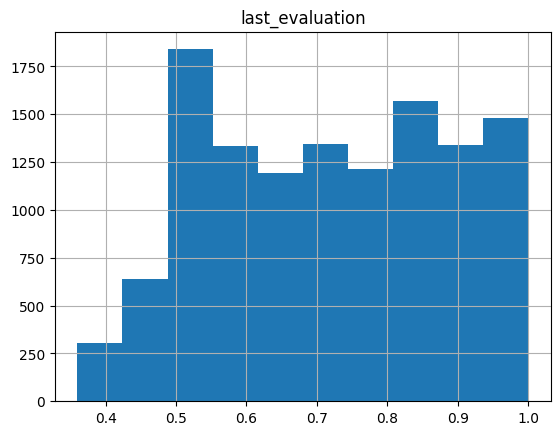

In [8]:
dataset.hist(column='last_evaluation')

array([[<AxesSubplot:title={'center':'number_project'}>]], dtype=object)

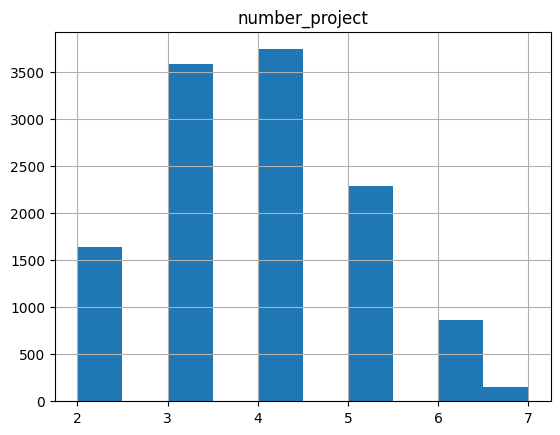

In [9]:
dataset.hist(column='number_project')

array([[<AxesSubplot:title={'center':'average_montly_hours'}>]],
      dtype=object)

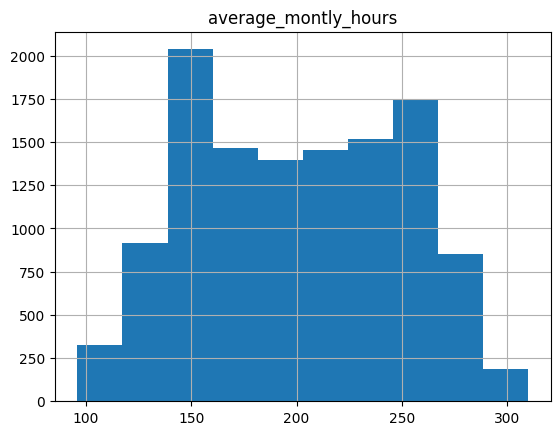

In [10]:
dataset.hist(column='average_montly_hours')

array([[<AxesSubplot:title={'center':'time_spend_company'}>]],
      dtype=object)

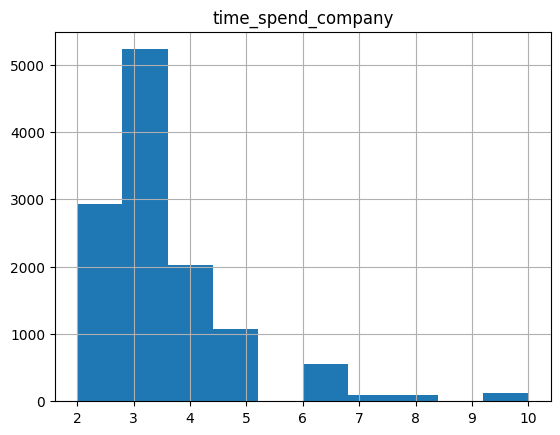

In [11]:
dataset.hist(column='time_spend_company')

array([[<AxesSubplot:title={'center':'work_accident'}>]], dtype=object)

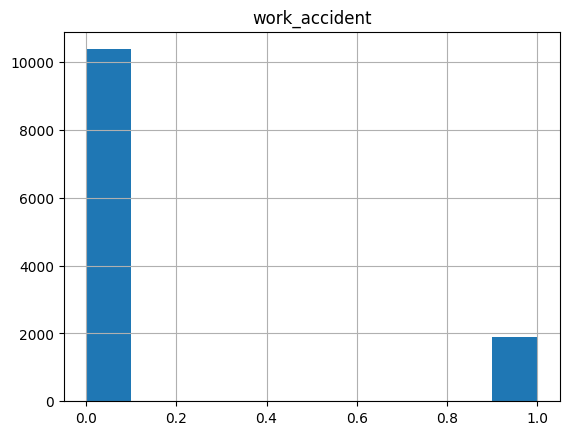

In [12]:
dataset.hist(column='work_accident')

array([[<AxesSubplot:title={'center':'promotion_last_5years'}>]],
      dtype=object)

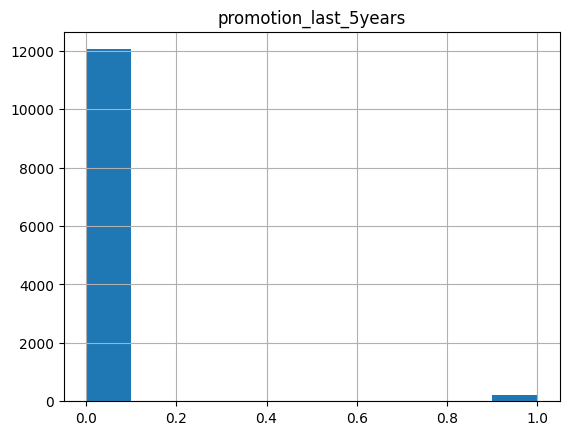

In [13]:
dataset.hist(column='promotion_last_5years')

In [14]:
dataset.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
work_accident              2
left                       2
promotion_last_5years      2
is_smoker                  2
department                10
salary                     3
dtype: int64

<AxesSubplot:xlabel='left', ylabel='Count'>

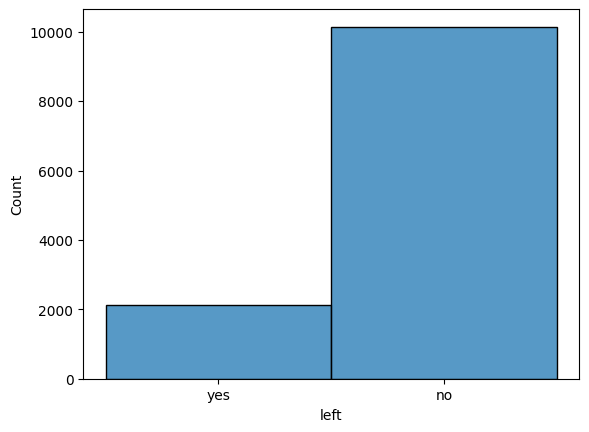

In [15]:
import seaborn
seaborn.histplot(dataset["left"])

In [16]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


<AxesSubplot:xlabel='is_smoker', ylabel='Count'>

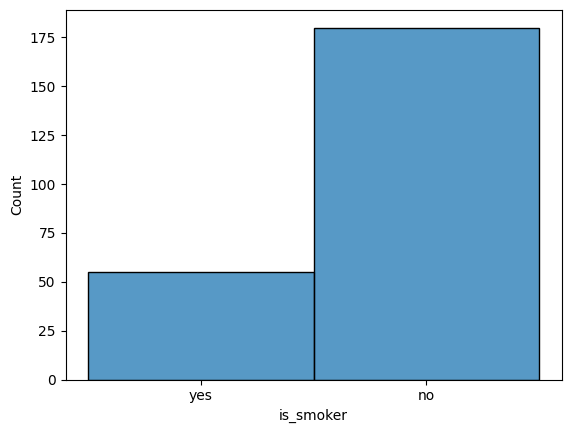

In [17]:
seaborn.histplot(dataset["is_smoker"])

<AxesSubplot:xlabel='department', ylabel='Count'>

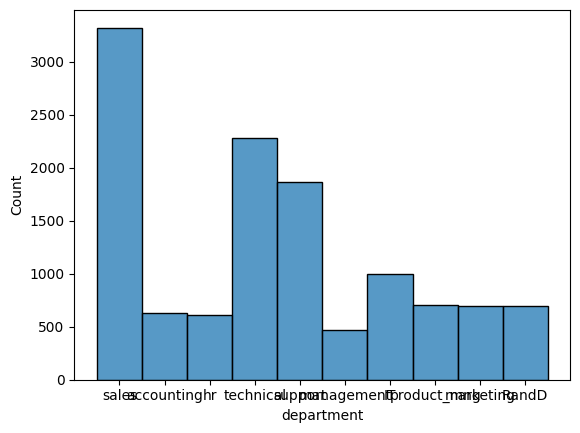

In [18]:
seaborn.histplot(dataset["department"])

<AxesSubplot:xlabel='salary', ylabel='Count'>

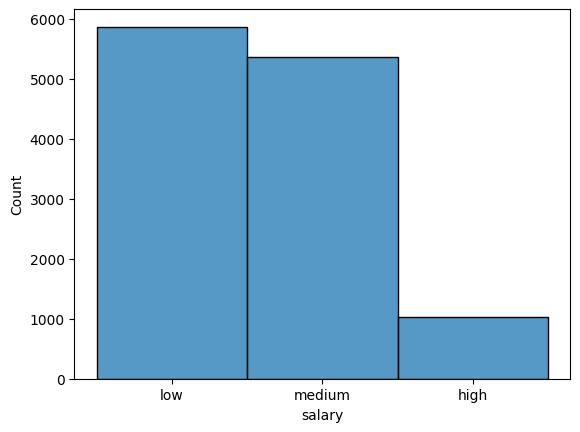

In [19]:
seaborn.histplot(dataset["salary"])

In [20]:
dataset.isnull().sum().sum()

12542

In [21]:
itnhat = dataset.isnull().sum().idxmax()

In [22]:
dataset = dataset.drop(columns=itnhat)
dataset = dataset.fillna(dataset.mean(numeric_only=True).round(1))
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low
4,0.37,0.52,2,200.5,3.4,0,yes,0,sales,low


In [23]:
dataset.isnull().sum().sum()

0

In [24]:
dataset['left'] = dataset['left'].map({'no':0,'yes':1})

In [25]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,1,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,1,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,1,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,1,0,sales,low
4,0.37,0.52,2,200.5,3.4,0,1,0,sales,low


In [26]:
dataset.to_csv("cleandata.csv")

In [27]:
from sklearn.model_selection import train_test_split
utrain = dataset.drop(columns='left')
utest = dataset['left']
utrainx,utestx,utrainy,utesty = train_test_split(utrain,utest,test_size=0.2)
utrainx

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
5657,0.86,0.91,3,234.0,3.0,1,0,marketing,low
789,0.10,0.92,6,243.0,4.0,1,0,sales,low
11578,0.76,0.56,5,222.0,10.0,0,0,management,high
8453,0.18,0.76,5,173.0,4.0,0,0,support,medium
2275,0.94,0.74,5,171.0,3.0,0,0,IT,low
...,...,...,...,...,...,...,...,...,...
11990,0.49,0.49,4,212.0,7.0,0,0,product_mng,medium
5566,0.98,0.60,4,191.0,3.0,0,0,IT,low
7697,0.91,0.55,2,234.0,2.0,0,0,IT,low
2795,0.64,0.61,5,249.0,3.0,1,0,support,medium


In [28]:
utestx

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
1044,0.63,0.94,3,179.0,2.0,0,0,support,medium
10390,0.59,0.61,3,200.5,2.0,0,0,sales,medium
5728,0.73,0.45,5,232.0,4.0,0,0,accounting,low
2962,0.99,0.84,5,138.0,2.0,0,0,IT,medium
4883,0.78,0.95,3,249.0,4.0,0,0,RandD,low
...,...,...,...,...,...,...,...,...,...
11147,0.57,0.59,4,250.0,2.0,0,0,support,low
9694,0.84,0.49,3,172.0,4.0,0,0,RandD,medium
3729,0.90,0.66,3,261.0,3.0,1,0,product_mng,medium
546,0.37,0.47,2,149.0,3.0,0,0,sales,low


<AxesSubplot:xlabel='left', ylabel='Count'>

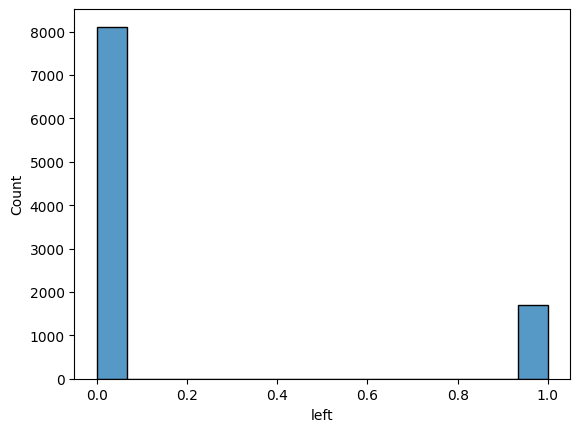

In [29]:
strain,stest = train_test_split(dataset,test_size=0.2,stratify=dataset['left'])
seaborn.histplot(strain['left'])

<AxesSubplot:xlabel='left', ylabel='Count'>

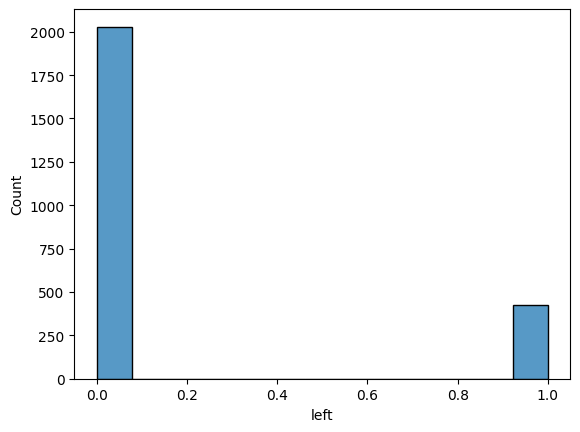

In [30]:
seaborn.histplot(stest['left'])

In [31]:

strainx = strain.drop(columns='left')
strainy = strain['left']
stestx = stest.drop(columns='left')
stesty = stest['left']
strainx

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
8046,0.93,0.53,3,217.0,3.0,0,0,hr,low
9434,0.81,0.44,4,166.0,4.0,1,0,support,low
7618,0.85,0.74,3,250.0,3.0,1,0,IT,low
11092,0.61,0.50,4,269.0,3.0,0,0,IT,medium
8920,0.71,0.61,2,216.0,2.0,0,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...
10055,0.31,0.37,2,104.0,3.0,1,0,support,medium
5071,0.69,0.74,4,237.0,3.0,0,0,technical,low
10327,0.64,0.43,5,269.0,3.0,0,0,sales,medium
2034,0.82,0.79,4,224.0,2.0,0,0,support,low


In [32]:
stestx

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
11110,0.44,0.51,2,219.0,4.0,0,0,sales,low
10366,0.61,0.46,3,171.0,3.0,0,0,IT,medium
34,0.84,0.87,4,246.0,6.0,0,0,hr,low
4102,0.15,0.61,3,146.0,6.0,1,0,technical,medium
6098,0.65,0.53,5,142.0,3.0,0,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...
7891,0.57,0.76,4,164.0,2.0,0,0,hr,low
4525,0.91,0.49,6,272.0,6.0,0,0,sales,low
10434,0.77,0.65,2,162.0,4.0,1,0,support,medium
2315,0.78,0.76,5,168.0,4.0,1,0,sales,low
